In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("data\malware_cleaned.csv")
df

SHA256  virtualallocex  \
0      002ce0d28ec990aadbbc89df457189de37d8adaadc9c08...               1   
1      dacbe8cb72dd746539792a50e84965fefef73feaa07b5d...               0   
2      d3dc7512ce75db33b2c3063fa99245e9ca9fe3b086462f...               0   
3      b350fac81533f02981dc2176ed17163177d92d9405758e...               0   
4      dfee618043a47b7b09305df0ca460559d9f567ee246c7b...               0   
...                                                  ...             ...   
29484  d1c923ec32d09be96adf3ba85e1855402f782b74437534...               0   
29485  d1dfc3203d99c0d54351bebd876762f27c0073e3cfef9a...               0   
29486  d1fea52507fc97ff419f8dd2ea8ecf689fb7c066cf8f18...               0   
29487  d201d8488d316c9ab7d537545efeda284568a652f23db1...               0   
29488  d207f51e336ab58868189d7826ef4fa2c897ae606ea744...               0   

       getversion  getprocaddress  getmodulefilenamew  getmodulehandlew  \
0               1               1                   1                 1   
1               0               0                   0                 0   
2               0               0                   0                 0   
3               0               0                   0                 0   
4               0               0                   0                 0   
...           ...             ...                 ...               ...   
29484           0               0                   0                 0   
29485           0               0                   0                 0   
29486           0               0                   0                 0   
29487           0               0                   0                 0   
29488           0               0                   0                 0   

       getmodulehandlea  raiseexception  exitprocess  getstartupinfow  ...  \
0                     1               1            1                1  ...   
1                     0               0            0                0  ...   
2                     0               0            0                0  ...   
3                     0               0            0                0  ...   
4                     0               0            0                0  ...   
...                 ...             ...          ...              ...  ...   
29484                 0               0            0                0  ...   
29485                 0               0            0                0  ...   
29486                 0               0            0                0  ...   
29487                 0               0            0                0  ...   
29488                 0               0            0                0  ...   

       rsrc_VirtualAddress  rsrc_SizeOfRawData  rsrc_PointerToRawData  \
0                   401408                1536                 378368   
1                   122880                4096                 118784   
2                    32768                1536                  17408   
3                   516096                1536                 507392   
4                  1327104               28672                1318912   
...                    ...                 ...                    ...   
29484               909312               50688                 894464   
29485               401408               18944                 387584   
29486               933888               13312                 924160   
29487              1097728                1536                1088000   
29488               663552                2048                 651776   

       rsrc_Characteristics  reloc_Misc_VirtualSize  reloc_VirtualAddress  \
0                1073741888                    4836                405504   
1                1073741888                      12                131072   
2                1073741888                      12                 40960   
3                1073741888                      12                524288   
4                1073741888          

In [3]:
# Exploratory Data Analysis
df.describe()

virtualallocex   getversion  getprocaddress  getmodulefilenamew  \
count    29489.000000  29489.00000    29489.000000        29489.000000   
mean         0.046390      0.09529        0.456238            0.216793   
std          0.210332      0.29362        0.498090            0.412067   
min          0.000000      0.00000        0.000000            0.000000   
25%          0.000000      0.00000        0.000000            0.000000   
50%          0.000000      0.00000        0.000000            0.000000   
75%          0.000000      0.00000        1.000000            0.000000   
max          1.000000      1.00000        1.000000            1.000000   

       getmodulehandlew  getmodulehandlea  raiseexception   exitprocess  \
count      29489.000000      29489.000000    29489.000000  29489.000000   
mean           0.268507          0.322120        0.246736      0.386076   
std            0.443190          0.467297        0.431119      0.486857   
min            0.000000          0.000000        0.000000      0.000000   
25%            0.000000          0.000000        0.000000      0.000000   
50%            0.000000          0.000000        0.000000      0.000000   
75%            1.000000          1.000000        0.000000      1.000000   
max            1.000000          1.000000        1.000000      1.000000   

       getstartupinfow     heapalloc  ...  rsrc_VirtualAddress  \
count     29489.000000  29489.000000  ...         2.948900e+04   
mean          0.133643      0.270542  ...         1.622872e+06   
std           0.340274      0.444247  ...         6.617073e+06   
min           0.000000      0.000000  ...         0.000000e+00   
25%           0.000000      0.000000  ...         7.782400e+04   
50%           0.000000      0.000000  ...         2.990080e+05   
75%           0.000000      1.000000  ...         7.208960e+05   
max           1.000000      1.000000  ...         1.225605e+08   

       rsrc_SizeOfRawData  rsrc_PointerToRawData  rsrc_Characteristics  \
count        2.948900e+04           2.948900e+04          2.948900e+04   
mean         9.163582e+04           3.983730e+05          1.111093e+09   
std          3.953789e+05           7.922575e+05          6.552939e+08   
min          0.000000e+00           0.000000e+00          0.000000e+00   
25%          1.536000e+03           3.635200e+04          1.073742e+09   
50%          8.192000e+03           2.186240e+05          1.073742e+09   
75%          7.168000e+04           5.222400e+05          1.073742e+09   
max          2.525645e+07           3.380019e+07          4.026532e+09   

       reloc_Misc_VirtualSize  reloc_VirtualAddress  reloc_SizeOfRawData  \
count            2.948900e+04          2.948900e+04         2.948900e+04   
mean             2.531747e+03          6.293918e+05         2.256589e+03   
std              1.704972e+04          3.451257e+06         1.220060e+04   
min              0.000000e+00          0.000000e+00         0.000000e+00   
25%              0.000000e+00          0.000000e+00         0.000000e+00   
50%              1.200000e+01          3.686400e+04         5.120000e+02   
75%              1.200000e+01          5.980160e+05         5.120000e+02   
max              1.896448e+06          1.225851e+08         1.241088e+06   

       reloc_PointerToRawData  reloc_Characteristics          type  
count            2.948900e+04           2.948900e+04  29489.000000  
mean             3.137056e+05           5.980430e+08      3.145444  
std              7.450379e+05           6.172093e+08      1.806526  
min              0.000000e+00           0.000000e+00      0.000000  
25%              0.000000e+00           0.000000e+00      2.000000  
50%              2.048000e+04           1.107296e+09      3.000000  
75%              5.038080e+05           1.107296e+09      5.000000  
max              3.417498e+07           3.791651e+09      6.000000  

[8 rows x 79 columns]

In [4]:
df['type'].value_counts()

type
4    5076
1    5022
3    4955
2    4643
5    4217
6    3699
0    1877
Name: count, dtype: int64

In [5]:
dnum=df.select_dtypes(include='number')
dnum

virtualallocex  getversion  getprocaddress  getmodulefilenamew  \
0                   1           1               1                   1   
1                   0           0               0                   0   
2                   0           0               0                   0   
3                   0           0               0                   0   
4                   0           0               0                   0   
...               ...         ...             ...                 ...   
29484               0           0               0                   0   
29485               0           0               0                   0   
29486               0           0               0                   0   
29487               0           0               0                   0   
29488               0           0               0                   0   

       getmodulehandlew  getmodulehandlea  raiseexception  exitprocess  \
0                     1                 1               1            1   
1                     0                 0               0            0   
2                     0                 0               0            0   
3                     0                 0               0            0   
4                     0                 0               0            0   
...                 ...               ...             ...          ...   
29484                 0                 0               0            0   
29485                 0                 0               0            0   
29486                 0                 0               0            0   
29487                 0                 0               0            0   
29488                 0                 0               0            0   

       getstartupinfow  heapalloc  ...  rsrc_VirtualAddress  \
0                    1          1  ...               401408   
1                    0          0  ...               122880   
2                    0          0  ...                32768   
3                    0          0  ...               516096   
4                    0          0  ...              1327104   
...                ...        ...  ...                  ...   
29484                0          0  ...               909312   
29485                0          0  ...               401408   
29486                0          0  ...               933888   
29487                0          0  ...              1097728   
29488                0          0  ...               663552   

       rsrc_SizeOfRawData  rsrc_PointerToRawData  rsrc_Characteristics  \
0                    1536                 378368            1073741888   
1                    4096                 118784            1073741888   
2                    1536                  17408            1073741888   
3                    1536                 507392            1073741888   
4                   28672                1318912            1073741888   
...                   ...                    ...                   ...   
29484               50688                 894464            1073741888   
29485               18944                 387584            1073741888   
29486               13312                 924160            1073741888   
29487                1536                1088000            1073741888   
29488                2048                 651776            1073741888   

       reloc_Misc_VirtualSize  reloc_VirtualAddress  reloc_SizeOfRawData  \
0                        4836                405504                 5120   
1                          12                131072                 4096   
2                          12                 40960                  512   
3                          12                524288                  512   
4                          12               1359872                 4096   
...                       ...                   ...                  ...   
29484                      12                966656            

In [6]:
dcorr=dnum.corr()
dcorr

virtualallocex  getversion  getprocaddress  \
virtualallocex                1.000000   -0.037536        0.228165   
getversion                   -0.037536    1.000000        0.351522   
getprocaddress                0.228165    0.351522        1.000000   
getmodulefilenamew            0.364052   -0.058072        0.568754   
getmodulehandlew              0.018802   -0.062416        0.629780   
...                                ...         ...             ...   
reloc_VirtualAddress         -0.022684   -0.014766        0.051428   
reloc_SizeOfRawData           0.041968    0.090205        0.151998   
reloc_PointerToRawData       -0.036237   -0.016737       -0.201686   
reloc_Characteristics        -0.122109   -0.014736       -0.425225   
type                         -0.046050   -0.078746       -0.276735   

                        getmodulefilenamew  getmodulehandlew  \
virtualallocex                    0.364052          0.018802   
getversion                       -0.058072         -0.062416   
getprocaddress                    0.568754          0.629780   
getmodulefilenamew                1.000000          0.678976   
getmodulehandlew                  0.678976          1.000000   
...                                    ...               ...   
reloc_VirtualAddress              0.140695          0.120371   
reloc_SizeOfRawData               0.197048          0.169864   
reloc_PointerToRawData           -0.094470         -0.102410   
reloc_Characteristics            -0.195506         -0.263906   
type                             -0.152376         -0.238367   

                        getmodulehandlea  raiseexception  exitprocess  \
virtualallocex                  0.241983       -0.015159     0.256604   
getversion                      0.396899        0.366131     0.370819   
getprocaddress                  0.676506        0.621341     0.824207   
getmodulefilenamew              0.335090        0.456924     0.614424   
getmodulehandlew                0.185271        0.436502     0.629622   
...                                  ...             ...          ...   
reloc_VirtualAddress           -0.003099        0.132298     0.075813   
reloc_SizeOfRawData             0.071325        0.247198     0.170594   
reloc_PointerToRawData         -0.189868       -0.083229    -0.157315   
reloc_Characteristics          -0.327904       -0.112167    -0.339895   
type                           -0.177782       -0.134818    -0.243602   

                        getstartupinfow  heapalloc  ...  rsrc_VirtualAddress  \
virtualallocex                 0.051257   0.018473  ...            -0.036158   
getversion                    -0.039895   0.179331  ...            -0.042127   
getprocaddress                 0.420375   0.618722  ...             0.188600   
getmodulefilenamew             0.700082   0.502296  ...             0.245078   
getmodulehandlew               0.642418   0.702723  ...             0.251168   
...                                 ...        ...  ...                  ...   
reloc_VirtualAddress           0.197517   0.114837  ...             0.487572   
reloc_SizeOfRawData            0.248723   0.183090  ...             0.174849   
reloc_PointerToRawData         0.002999  -0.126721  ...             0.022363   
reloc_Characteristics         -0.040422  -0.267043  ...            -0.075613   
type                          -0.081658  -0.239098  ...            -0.102660   

                        rsrc_SizeOfRawData  rsrc_PointerToRawData  \
virtualallocex                   -0.016582               0.014382   
getversion                        0.174074              -0.032641   
getprocaddress                    0.070841              -0.070705   
getmodulefilenamew               -0.035702              -0.051972   
getmodulehandlew                  0.024193              -0.050080   
...                                    ...                    ...   
reloc_VirtualAddress              0.045248               0.131400   
reloc_SizeOfRawData     

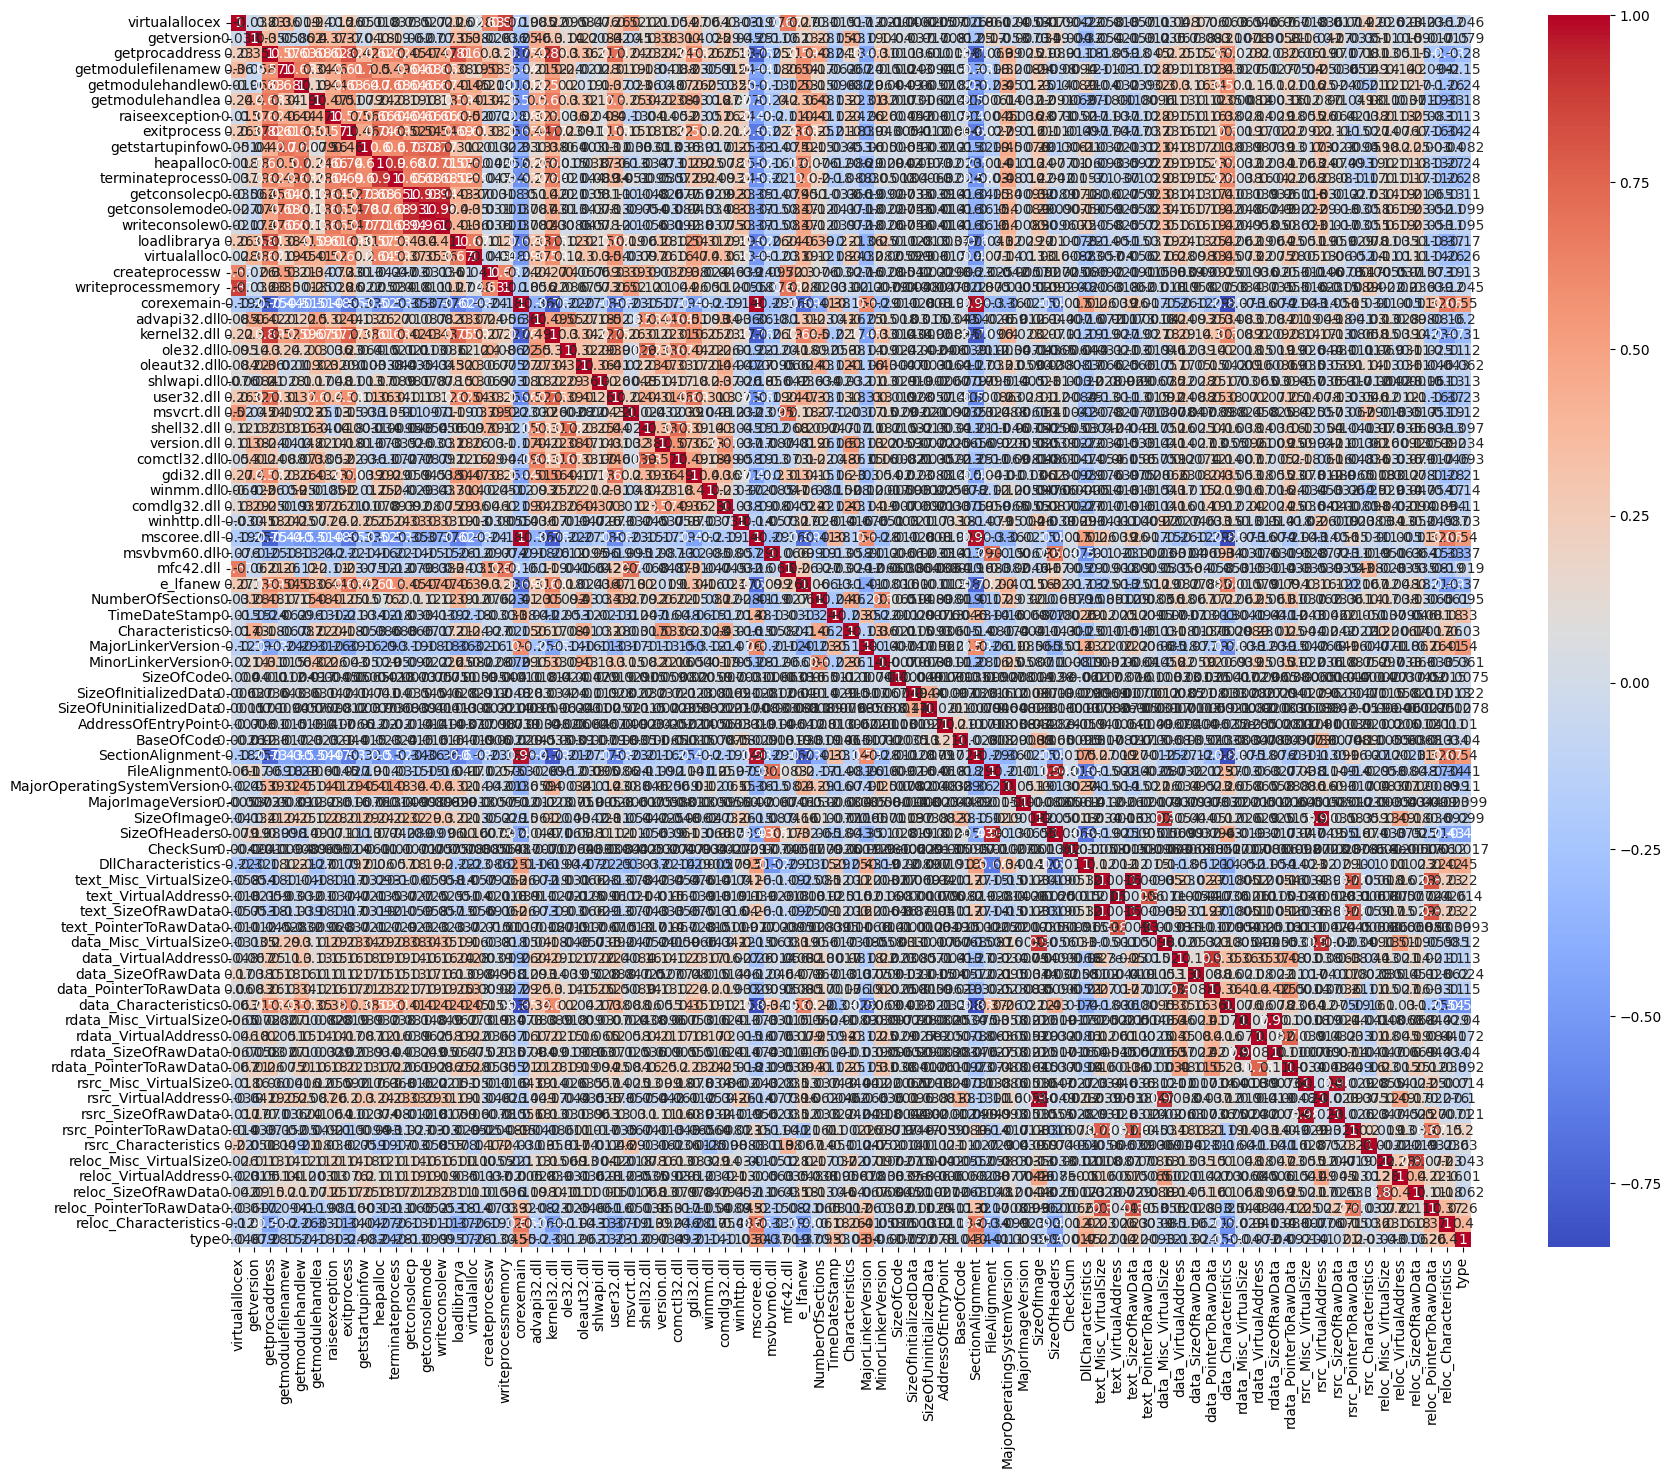

In [7]:
plt.figure(figsize=(20, 16))
sns.heatmap(dcorr, annot=True, cmap='coolwarm')
# plt.title(f'Correlation Heatmap - Decile {i+1}')
plt.show()

In [8]:
dcorrt=dcorr['type'][:-1]
# dcorrt=dcorrt.reset_index()
dcorrt

virtualallocex           -0.046050
getversion               -0.078746
getprocaddress           -0.276735
getmodulefilenamew       -0.152376
getmodulehandlew         -0.238367
                            ...   
reloc_Misc_VirtualSize   -0.043413
reloc_VirtualAddress     -0.009979
reloc_SizeOfRawData      -0.061957
reloc_PointerToRawData    0.255133
reloc_Characteristics     0.401016
Name: type, Length: 78, dtype: float64

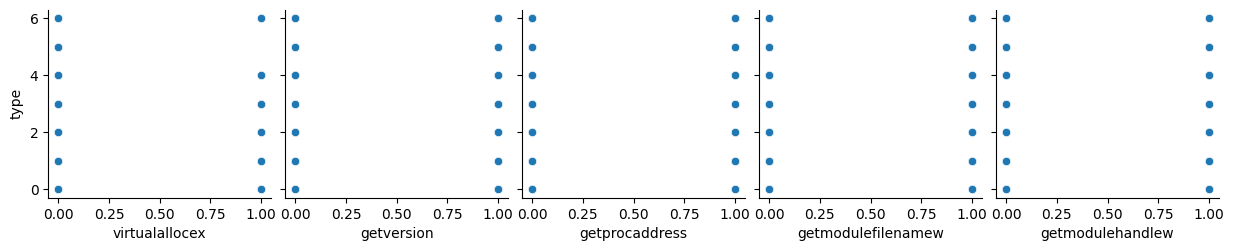

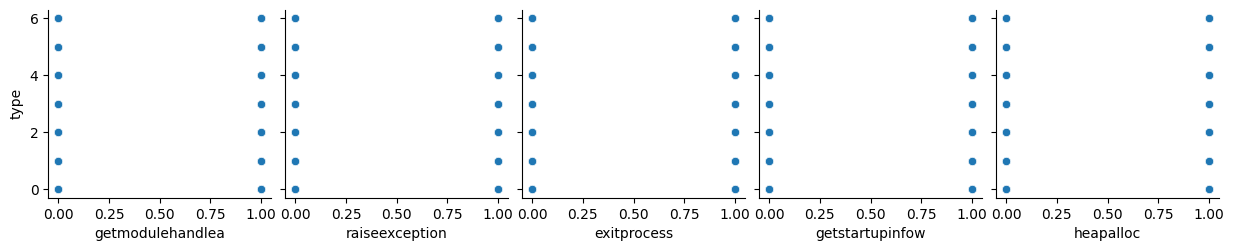

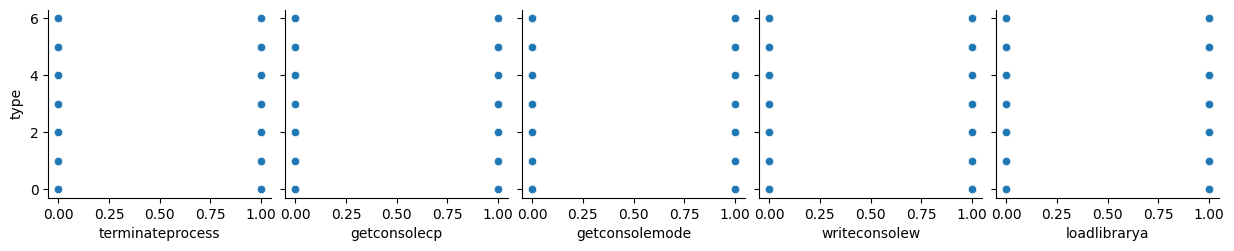

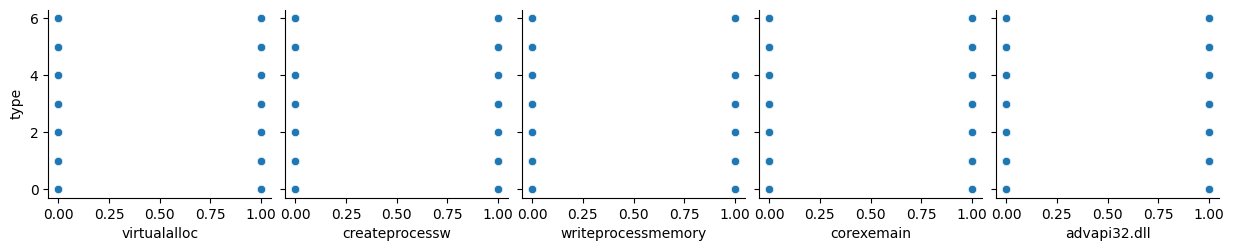

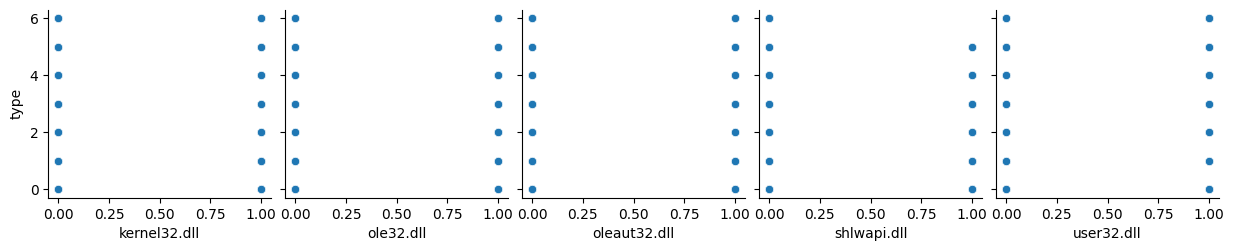

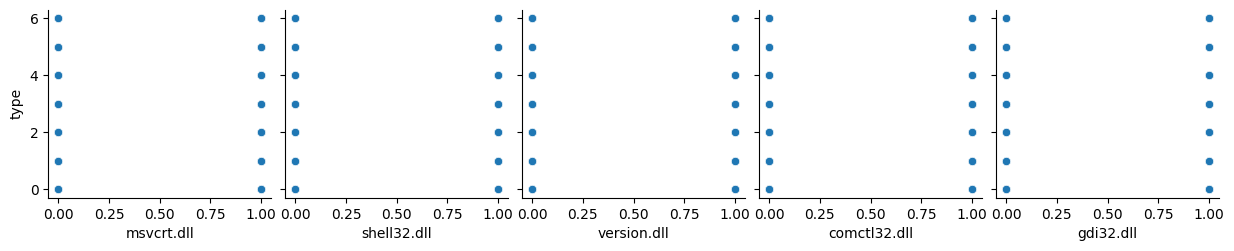

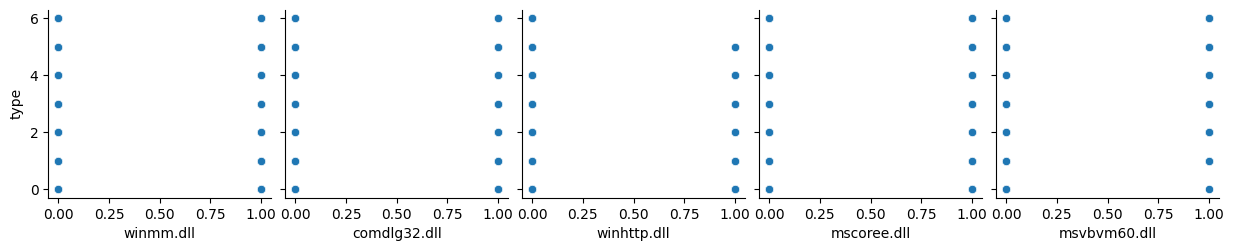

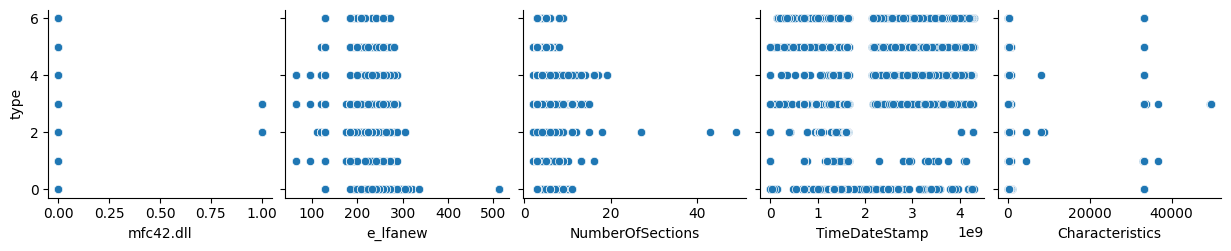

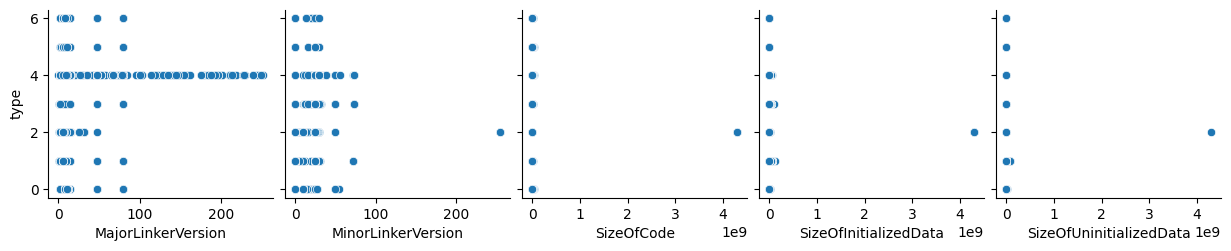

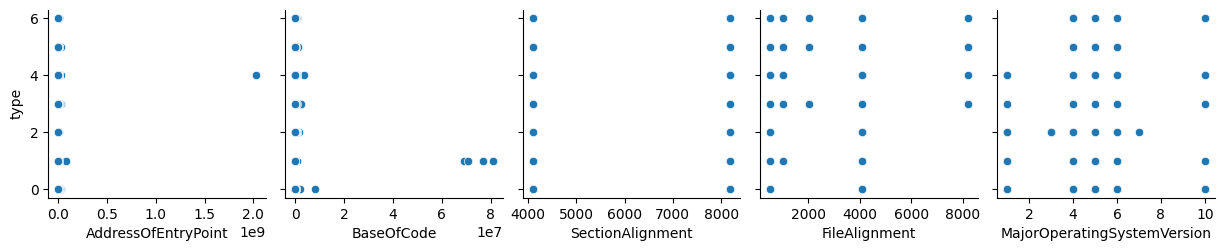

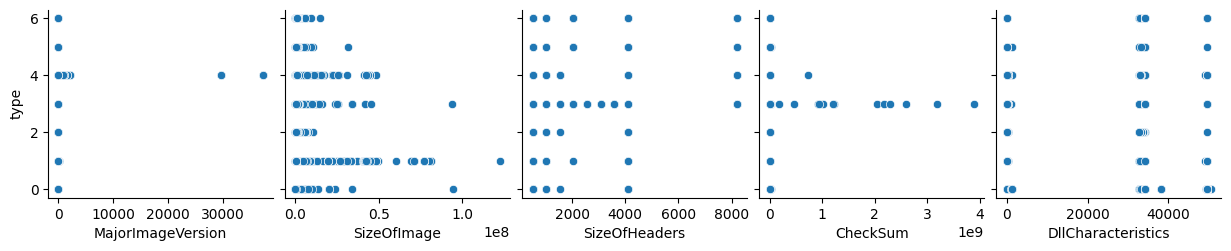

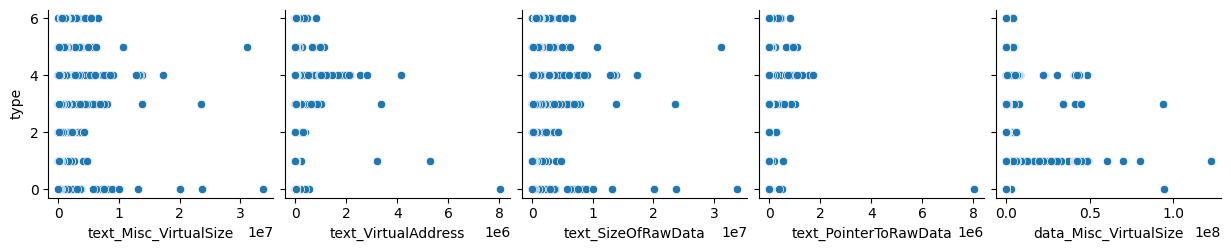

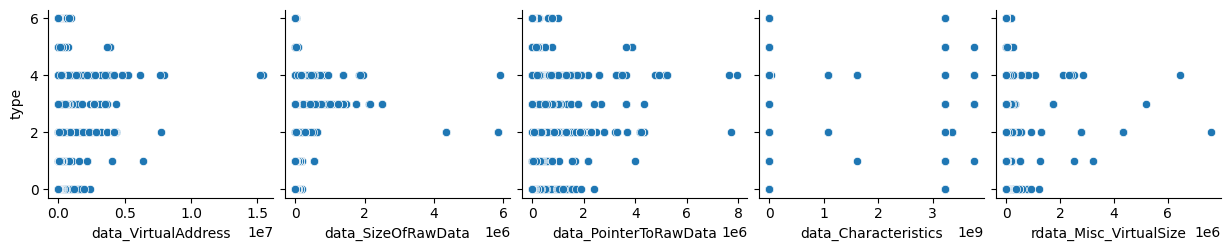

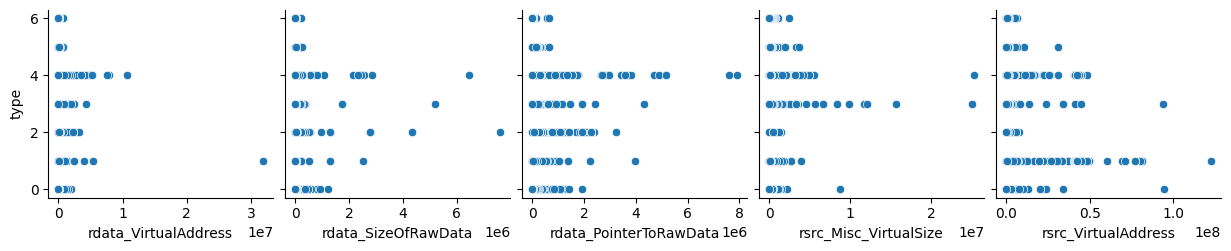

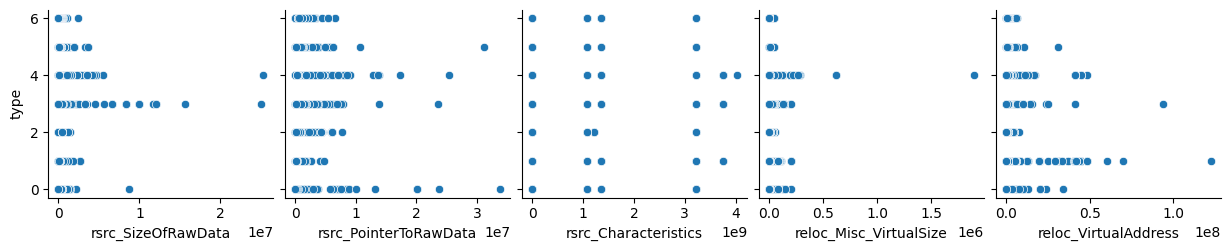

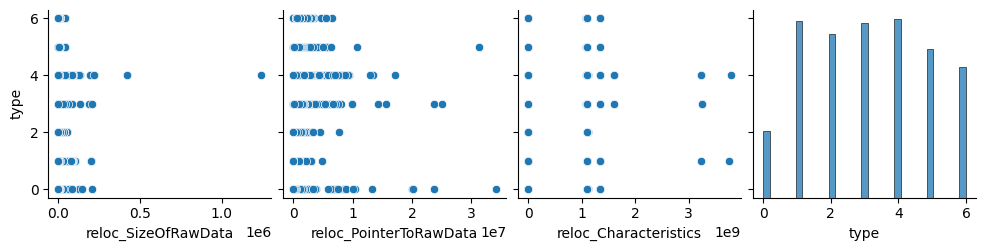

In [9]:
for i in range(0, len(dnum.columns), 5):
    sns.pairplot(data=dnum,
                x_vars=dnum.columns[i:i+5],
                y_vars=['type'])

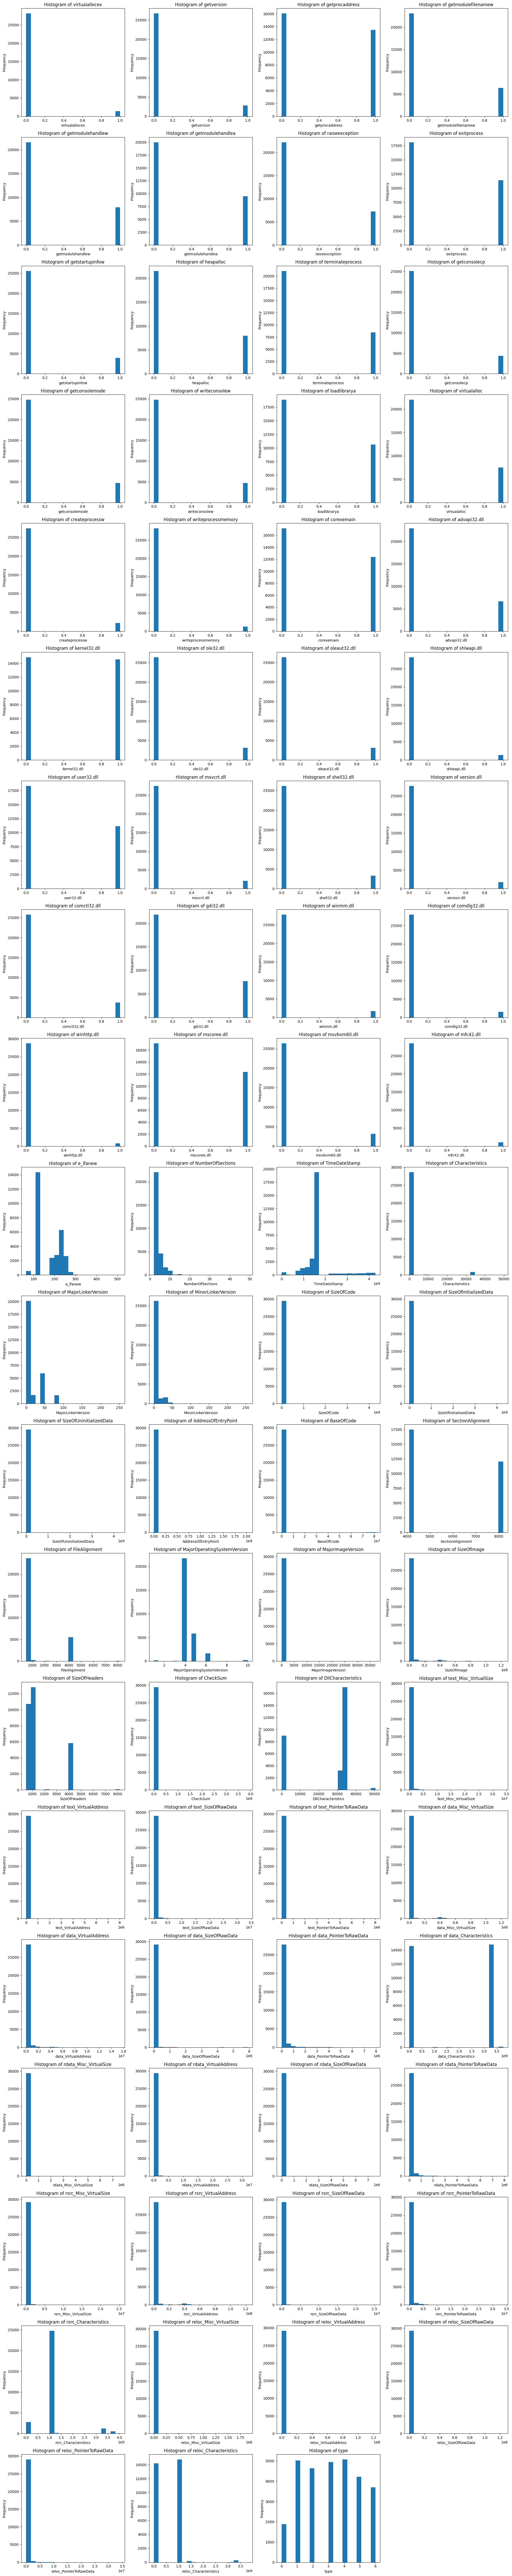

In [10]:
fig = plt.figure(figsize=(20, 100))  

# Loop through each column in the DataFrame
for i, column in enumerate(dnum.columns):
    # Create subplots
    plt.subplot(20, 4, i + 1)  
    plt.hist(dnum[column], bins=20)  
    
    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')


plt.tight_layout()
plt.show()

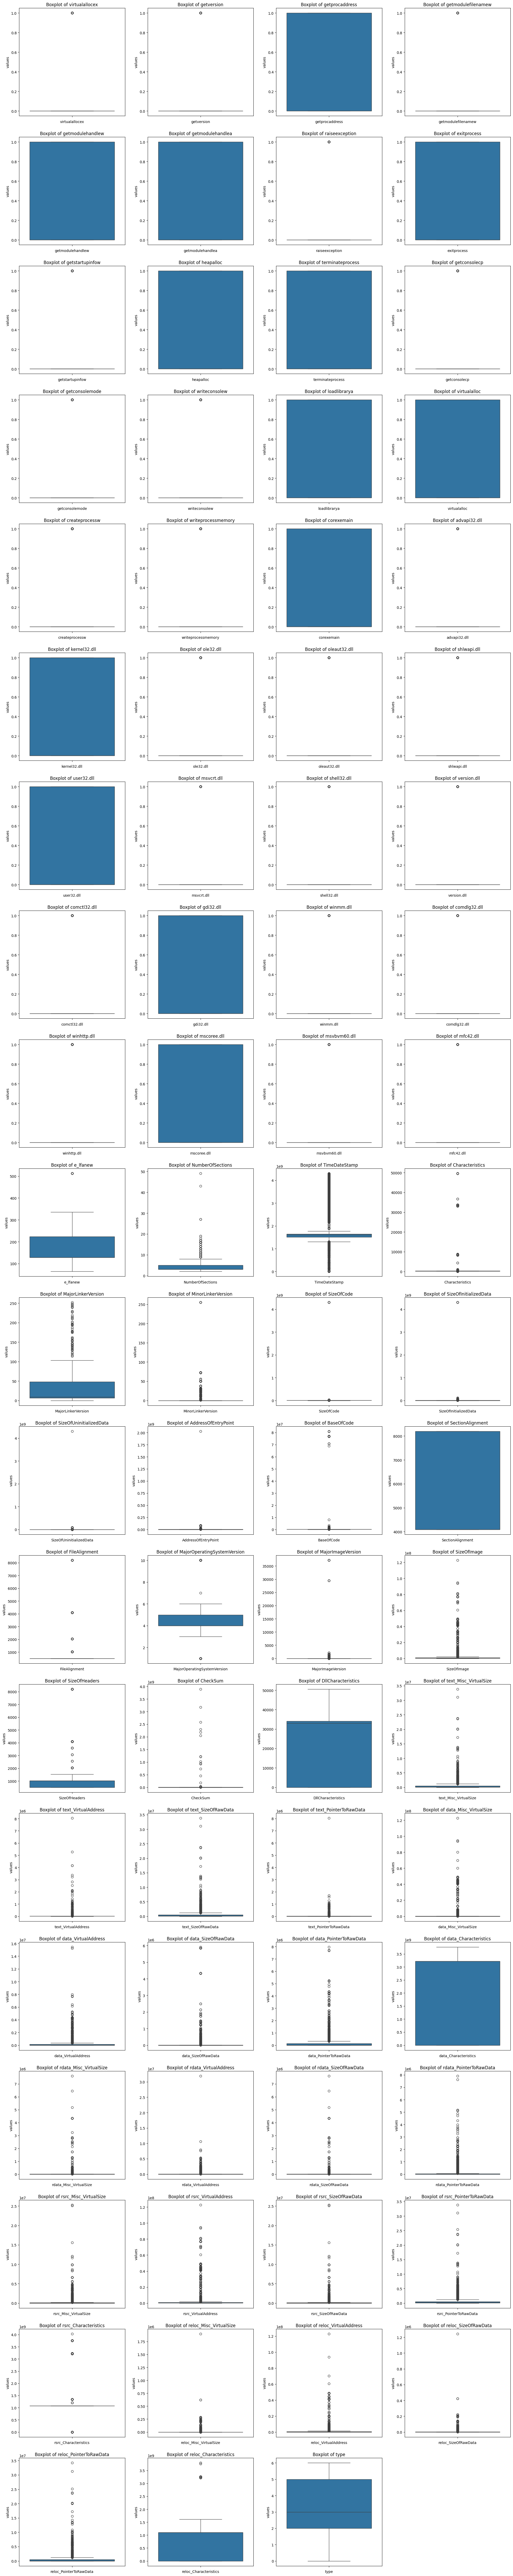

In [11]:
fig=plt.figure(figsize=(20,100))
for i,column in enumerate(dnum.columns):
    plt.subplot(20, 4, i + 1)
    sns.boxplot(dnum[column])
    plt.xlabel(column)
    plt.ylabel('values')
    plt.title(f'Boxplot of {column}')


plt.tight_layout()
plt.show()
# here , the full box means the min and Q1 are same and max and Q3 are same. this is because all values are binary, either 0 or 1 